In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('dados/dados.csv')
data

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


In [ ]:
frequency = data.Sexo.value_counts()

In [ ]:
frequency_percen = data.Sexo.value_counts(normalize = True) * 100

In [ ]:
qualitative_distri = pd.DataFrame({'Frequency' : frequency, 'Percentage (%)' : frequency_percen})

In [ ]:
qualitative_distri

,Frequency,Percentage (%)
0,53250,69.299844
1,23590,30.700156


In [ ]:
sex = {0 : 'M', 1 : 'F'}
qualitative_distri.rename(index = sex, inplace = True) 

In [ ]:
qualitative_distri.rename_axis('Sexo', axis = 1, inplace = True)

In [ ]:
sexo = {0: 'Masculino',
        1: 'Feminino'}

cor = {0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda',
        9: 'Sem declaração'}

In [ ]:
race_frequency = pd.crosstab(data.Sexo,
                             data.Cor)
race_frequency.rename(index = sexo, inplace = True)
race_frequency.rename(columns = cor, inplace = True)
race_frequency

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [ ]:
race_frequency = pd.crosstab(data.Sexo, data.Cor,
                             normalize = True) * 100
race_frequency.rename(index = sexo, inplace = True)
race_frequency.rename(columns = cor, inplace = True)
race_frequency

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [ ]:
race_frequency = pd.crosstab(data.Sexo, data.Cor,
                             aggfunc = 'mean', values = data.Renda)
race_frequency.rename(index = sexo, inplace = True)
race_frequency.rename(columns = cor, inplace = True)
race_frequency

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


In [ ]:
classes = [0, 1576, 3152, 7880, 15760, 200000]
labels = ['E', 'D', 'C', 'B', 'A']

In [ ]:
pd.cut(x = data.Renda,
       bins = classes, labels = labels,
       include_lowest = True)

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [ ]:
frequency = pd.value_counts(
    pd.cut(x = data.Renda,
       bins = classes, labels = labels,
       include_lowest = True)
)

In [ ]:
percentage = pd.value_counts(
    pd.cut(x = data.Renda,
       bins = classes, labels = labels,
       include_lowest = True),
    normalize = True
)
percentage

E    0.647514
D    0.217335
C    0.098894
B    0.028345
A    0.007913
Name: Renda, dtype: float64

In [ ]:
quantitative_distri = pd.DataFrame({'Frequency' : frequency, 'Percentage (%)' : percentage})
quantitative_distri

,Frequency,Percentage (%)
E,49755,0.647514
D,16700,0.217335
C,7599,0.098894
B,2178,0.028345
A,608,0.007913


In [ ]:
quantitative_distri.sort_index(ascending = False
                            )

,Frequency,Percentage (%)
A,608,0.007913
B,2178,0.028345
C,7599,0.098894
D,16700,0.217335
E,49755,0.647514


In [ ]:
classes = [data.Altura.min(), 1.65, 1.75, data.Altura.max()]
labels = ['1 - Baixa', '2 - Média', '3 - Alta']

frequencia = pd.value_counts(
    pd.cut(
        x = data.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    )
)

percentual = pd.value_counts(
    pd.cut(
        x = data.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    ), normalize = True
) * 100

dist_freq_altura = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)

dist_freq_altura.rename_axis('Estaturas', axis= 'columns', inplace = True)

dist_freq_altura.sort_index(ascending = True, inplace = True)

dist_freq_altura

Estaturas,Frequência,Porcentagem (%)
1 - Baixa,20529,26.716554
2 - Média,36162,47.061426
3 - Alta,20149,26.222020


In [ ]:
import numpy as np

In [ ]:
n = data.shape[0]

In [ ]:
k = 1 + (10/3) * np.log10(n)

In [ ]:
k = int(k)
k

17

In [ ]:
frequency = pd.value_counts(
    pd.cut(
        x = data.Renda,
        bins = k,
        include_lowest = True
    ),
    sort = False,
)

In [ ]:
percentage = pd.value_counts(
    pd.cut(
        x = data.Renda,
        bins = k,
        include_lowest = True,
    ),
    sort = False,
    normalize = True
)
percentage

(-200.001, 11764.706]       0.983784
(11764.706, 23529.412]      0.013300
(23529.412, 35294.118]      0.002199
(35294.118, 47058.824]      0.000247
(47058.824, 58823.529]      0.000208
(58823.529, 70588.235]      0.000065
(70588.235, 82352.941]      0.000052
(82352.941, 94117.647]      0.000013
(94117.647, 105882.353]     0.000078
(105882.353, 117647.059]    0.000000
(117647.059, 129411.765]    0.000013
(129411.765, 141176.471]    0.000000
(141176.471, 152941.176]    0.000000
(152941.176, 164705.882]    0.000000
(164705.882, 176470.588]    0.000000
(176470.588, 188235.294]    0.000000
(188235.294, 200000.0]      0.000039
Name: Renda, dtype: float64

In [ ]:
pinned_amplitude = pd.DataFrame({'Frequência' : frequencia, 'Percentage %' : percentage})
pinned_amplitude

,Frequência,Percentage %
"(-200.001, 11764.706]",NaN,0.983784
"(11764.706, 23529.412]",NaN,0.013300
"(23529.412, 35294.118]",NaN,0.002199
"(35294.118, 47058.824]",NaN,0.000247
"(47058.824, 58823.529]",NaN,0.000208
"(58823.529, 70588.235]",NaN,0.000065
"(70588.235, 82352.941]",NaN,0.000052
"(82352.941, 94117.647]",NaN,0.000013
"(94117.647, 105882.353]",NaN,0.000078
"(105882.353, 117647.059]",NaN,0.000000


## Histogram

In [ ]:
import seaborn as sns

C:\Users\mhenr\AppData\Local\Temp\ipykernel_12844\3915859649.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data.Altura, kde = False)


<AxesSubplot: title={'center': 'Frequency Distribuation - Height'}, xlabel='Meters'>

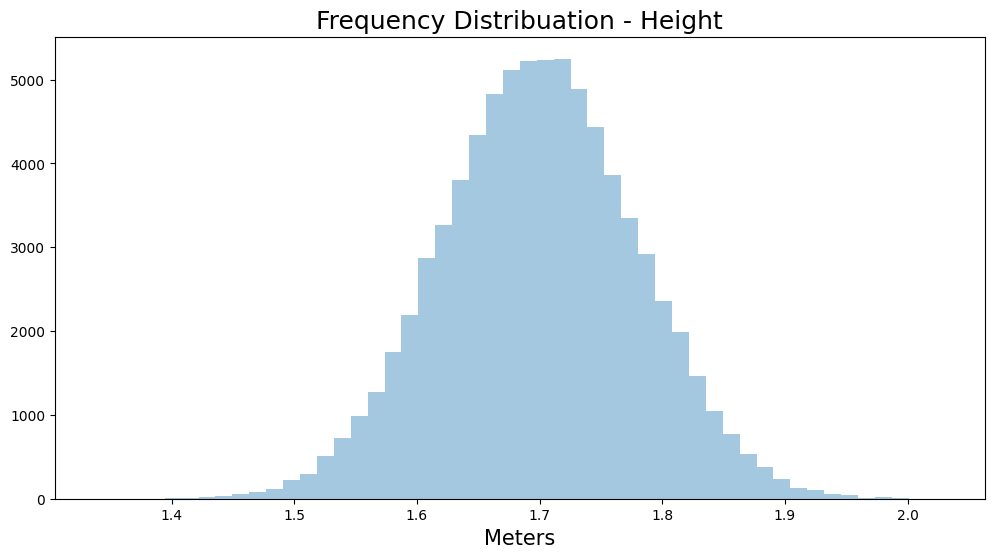

In [ ]:
ax = sns.distplot(data.Altura, kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency Distribuation - Height', fontsize = 18)
ax.set_xlabel('Meters', fontsize = 15)
ax

<AxesSubplot: >

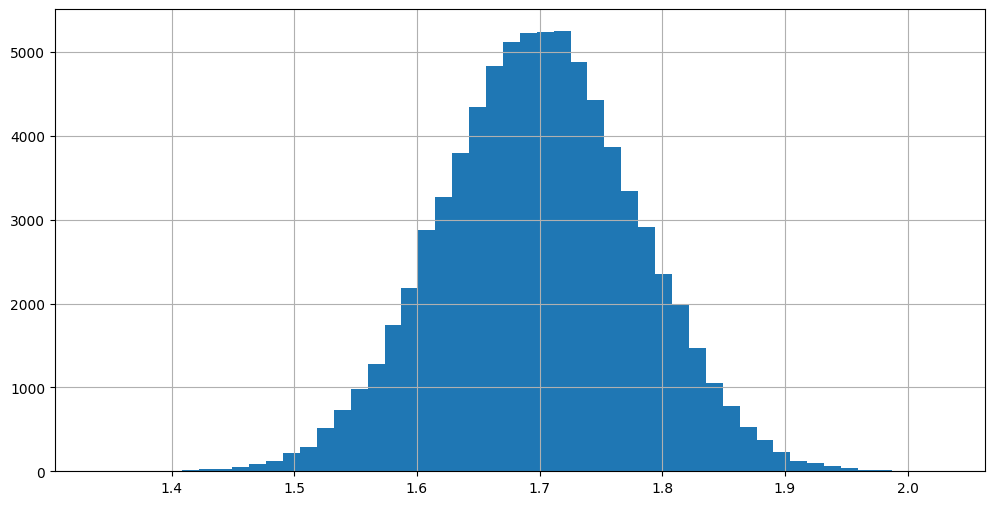

In [ ]:
data.Altura.hist(bins = 50, figsize = (12, 6))

<AxesSubplot: >

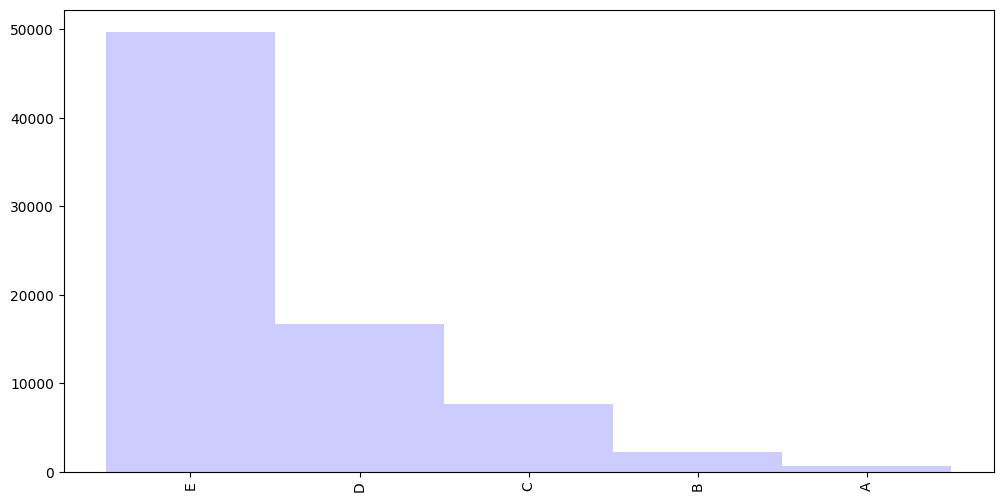

In [ ]:
quantitative_distri['Frequency'].plot.bar(width = 1, color = 'b', alpha = 0.2, figsize = (12, 6))